In [45]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy.random as rnd
rnd.seed(42)

from itertools import accumulate, chain
from functools import reduce

# Utils

In [43]:
def random_walk(size, mean=0, sd=1, start=0):
    sample = np.cumsum(rnd.normal(loc=mean, scale=sd, size=size))
    return pd.Series(sample + start - sample[0])
    
def slopes(limit, apfreq, mean=0, sd=1):
    counts = np.ceil(rnd.exponential(size=limit, scale=apfreq)).astype(np.int64)
    counts = counts[counts.cumsum() <= limit]
    counts = np.append(counts, limit - counts.sum())
    slopes = rnd.normal(size=len(counts), loc=mean, scale=sd)
    return pd.DataFrame({'counts': counts, 'slopes': slopes})
    
def piecewise_linear(size, slopes, start=0):
    return ply(lambda x: linear(int(x[0]), a=x[1]), axis=1, reduce=True)
    
def linear(size, a=1, b=0):
    return pd.Series(a * np.ones(size).cumsum() + b)

In [46]:
help(reduce)

Help on built-in function reduce in module _functools:

reduce(...)
    reduce(function, sequence[, initial]) -> value
    
    Apply a function of two arguments cumulatively to the items of a sequence,
    from left to right, so as to reduce the sequence to a single value.
    For example, reduce(lambda x, y: x+y, [1, 2, 3, 4, 5]) calculates
    ((((1+2)+3)+4)+5).  If initial is present, it is placed before the items
    of the sequence in the calculation, and serves as a default when the
    sequence is empty.



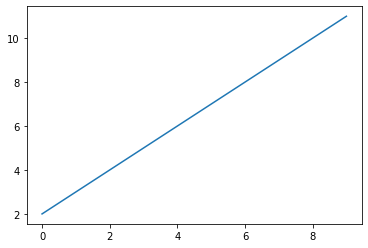

In [40]:
plt.plot(linear(10, start=2))